In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;


In [3]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\maratha-weapons.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Weapon Name                       495 non-null    object 
 1   Length (cm)                       495 non-null    float64
 2   Weight (kg)                       495 non-null    float64
 3   Effective Range (m)               495 non-null    float64
 4   Handedness                        470 non-null    float64
 5   Lethality/Damage Potential (1-5)  495 non-null    int64  
 6   Armor Penetration (1-5)           495 non-null    int64  
 7   Maneuverability/Agility (1-5)     495 non-null    int64  
 8   Training Complexity (1-5)         495 non-null    int64  
 9   Cost/Rarity (1-5)                 495 non-null    int64  
 10  Era of Prominence (Year)          495 non-null    int64  
 11  Battlefield Role (Numerical)      495 non-null    int64  
 12  Material

In [6]:
df.describe()

,Length (cm),Weight (kg),Effective Range (m),Handedness,Lethality/Damage Potential (1-5),Armor Penetration (1-5),Maneuverability/Agility (1-5),Training Complexity (1-5),Cost/Rarity (1-5),Era of Prominence (Year),Battlefield Role (Numerical),Material Strength (1-5)
count,495.000000,495.000000,495.000000,470.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,120.362222,33.375374,48.725434,1.627660,3.585859,3.165657,3.381818,2.929293,2.898990,1719.658586,2.010101,3.410101
std,97.293521,148.361706,163.360631,0.668895,0.853785,1.096937,1.301538,0.957101,0.842867,29.462091,1.454401,0.807041
min,10.000000,0.100000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1660.000000,1.000000,2.000000
25%,40.000000,0.800000,0.365000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1696.500000,1.000000,3.000000
50%,91.500000,1.600000,1.600000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1720.000000,1.000000,3.000000
75%,155.000000,2.700000,3.800000,2.000000,4.000000,4.000000,5.000000,3.000000,3.000000,1742.000000,3.000000,4.000000
max,400.000000,1000.000000,1000.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1792.000000,6.000000,5.000000


In [7]:
df.isnull().sum()

Weapon Name                          0
Length (cm)                          0
Weight (kg)                          0
Effective Range (m)                  0
Handedness                          25
Lethality/Damage Potential (1-5)     0
Armor Penetration (1-5)              0
Maneuverability/Agility (1-5)        0
Training Complexity (1-5)            0
Cost/Rarity (1-5)                    0
Era of Prominence (Year)             0
Battlefield Role (Numerical)         0
Material Strength (1-5)              0
dtype: int64

In [9]:
print(df.isnull().values.any())

True


In [11]:
print(df.isnull().mean()*100)

Weapon Name                         0.000000
Length (cm)                         0.000000
Weight (kg)                         0.000000
Effective Range (m)                 0.000000
Handedness                          5.050505
Lethality/Damage Potential (1-5)    0.000000
Armor Penetration (1-5)             0.000000
Maneuverability/Agility (1-5)       0.000000
Training Complexity (1-5)           0.000000
Cost/Rarity (1-5)                   0.000000
Era of Prominence (Year)            0.000000
Battlefield Role (Numerical)        0.000000
Material Strength (1-5)             0.000000
dtype: float64


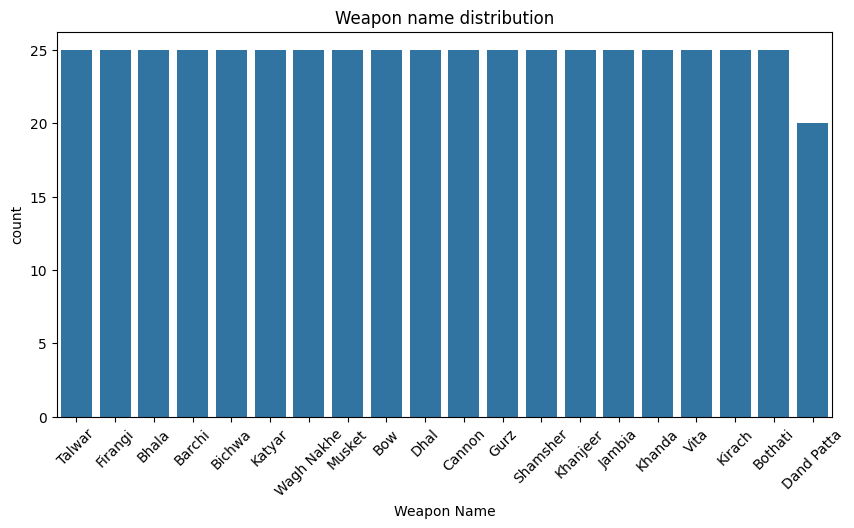

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['Weapon Name'], order=df['Weapon Name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Weapon name distribution")
plt.show()

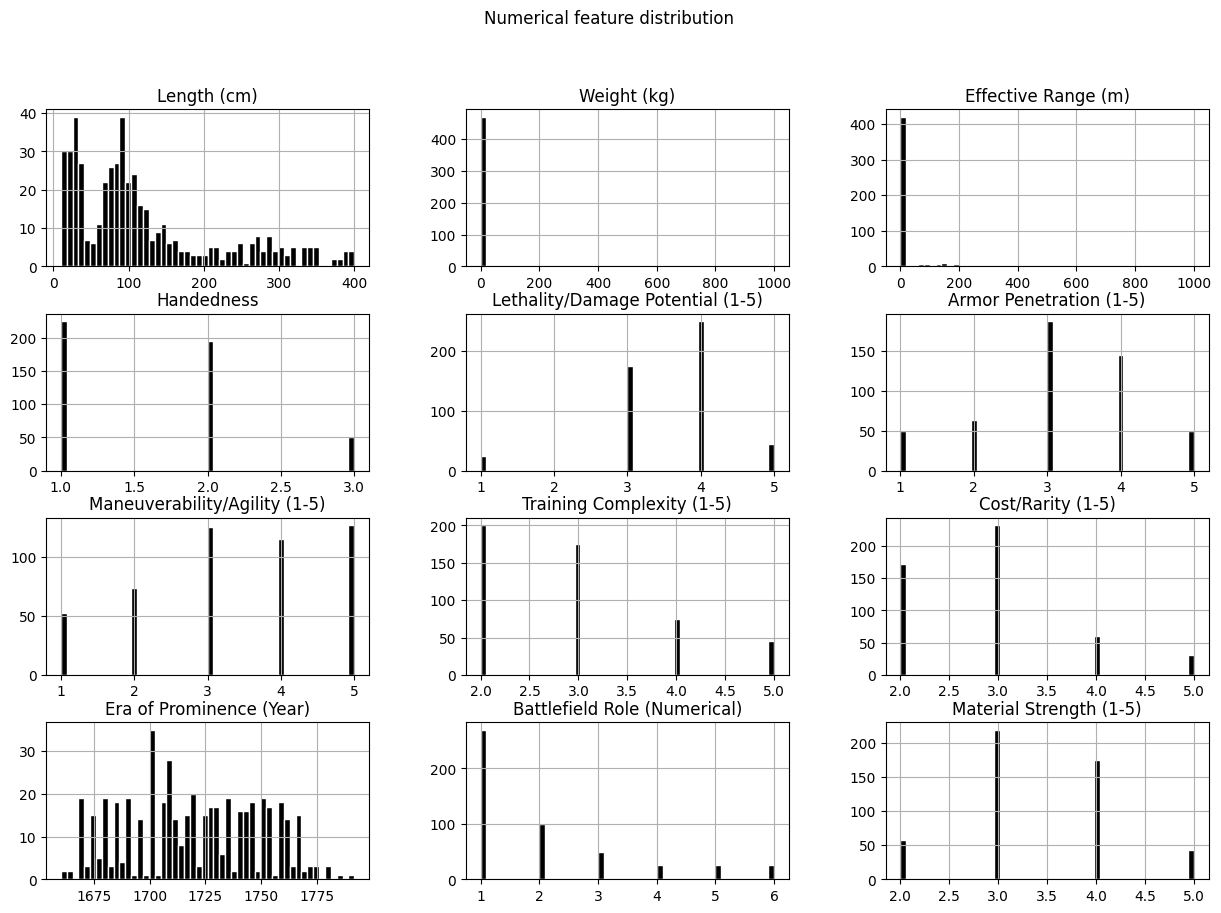

In [26]:
num_col = df.select_dtypes(include=np.number).columns
df[num_col].hist(bins=50,figsize=(15,10),color='black',edgecolor='white')
plt.suptitle('Numerical feature distribution')
plt.show()

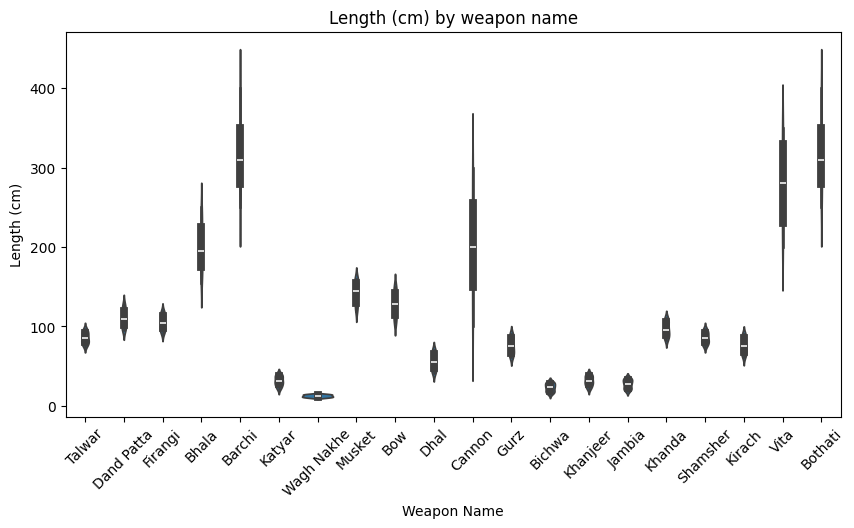

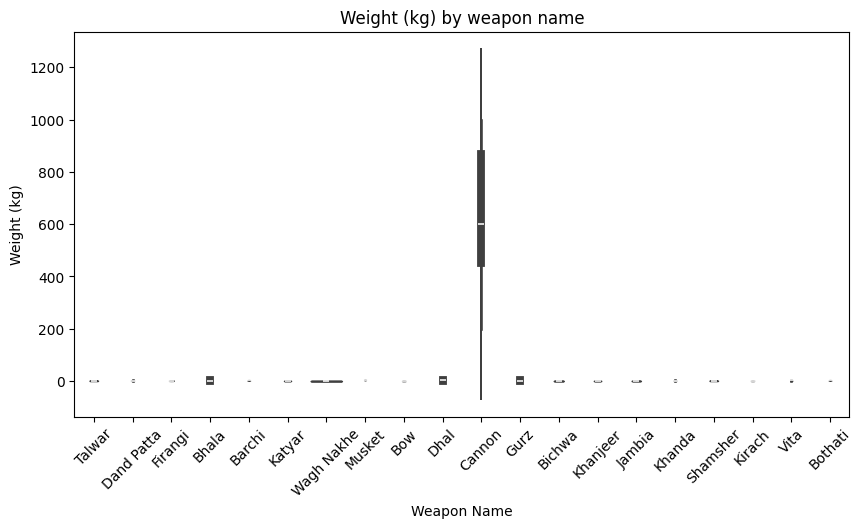

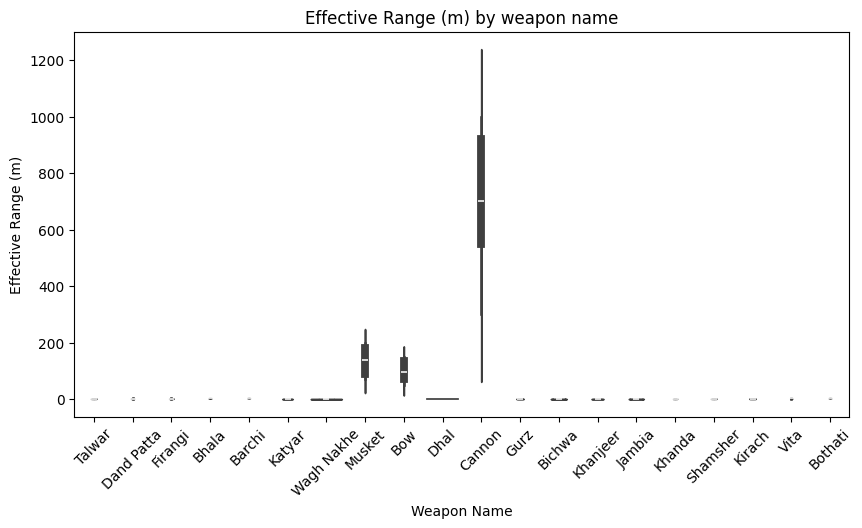

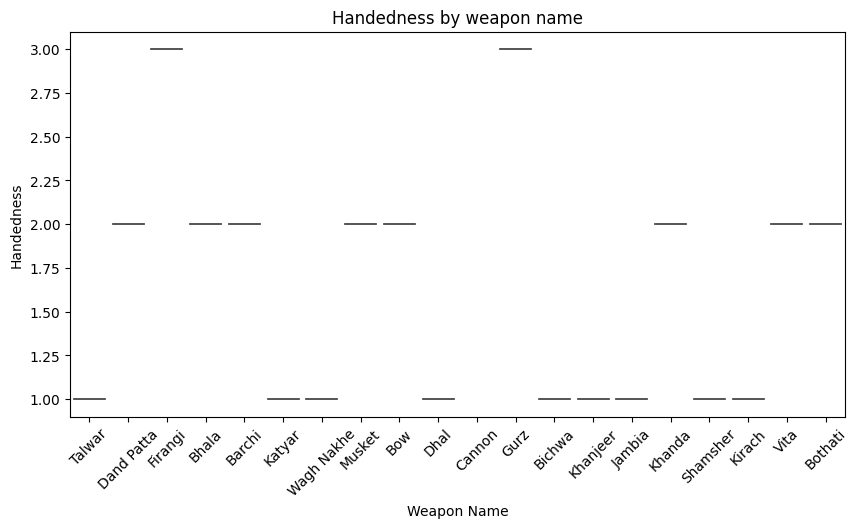

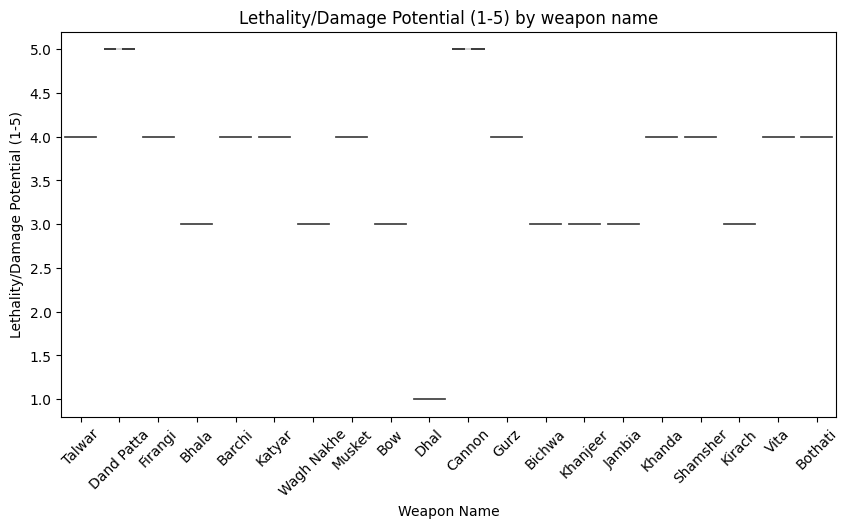

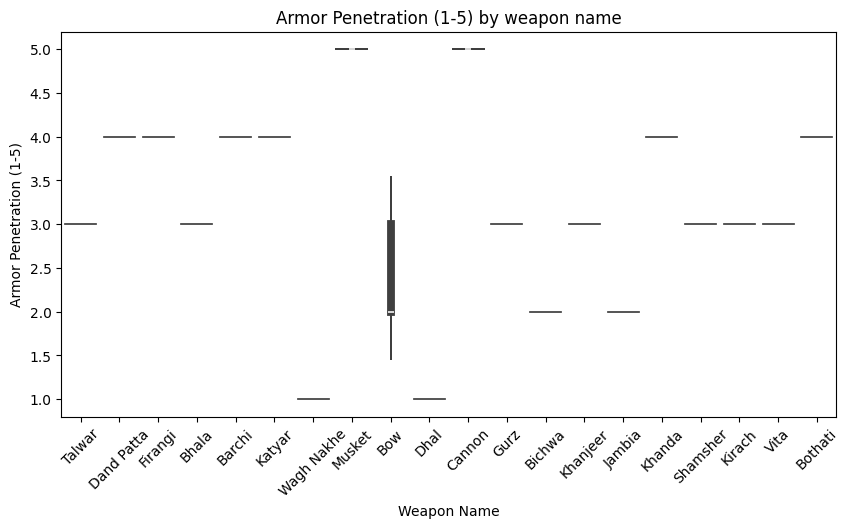

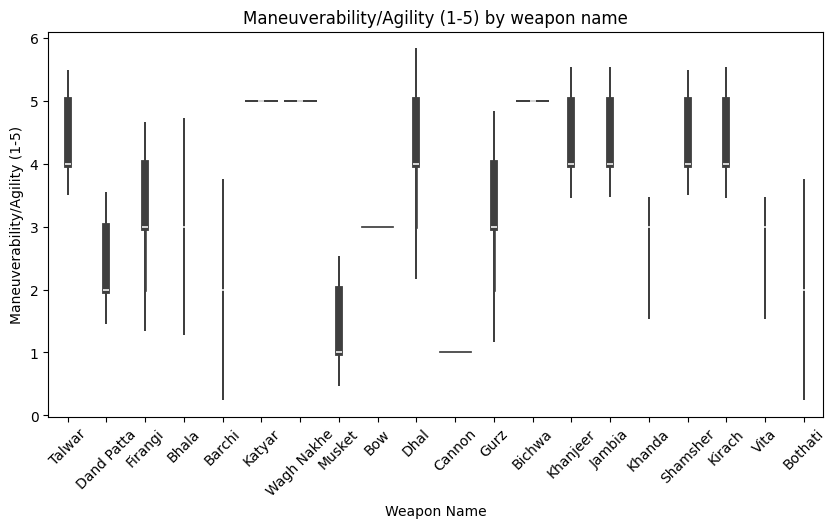

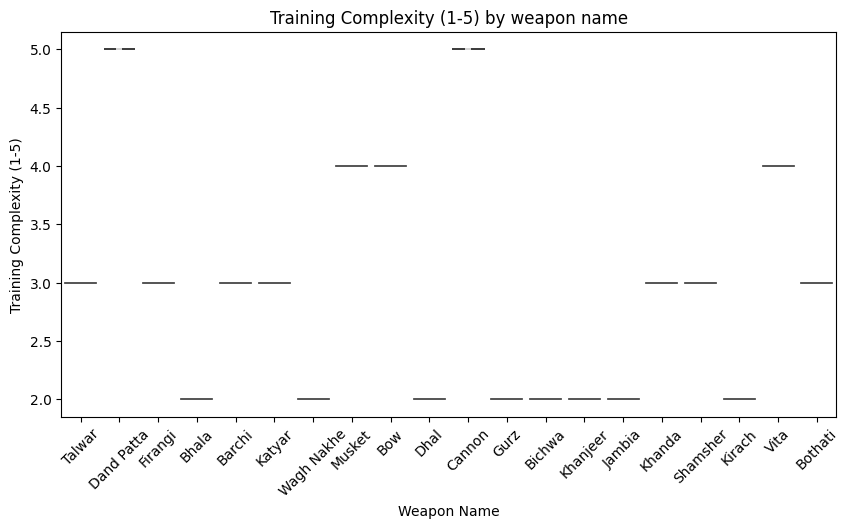

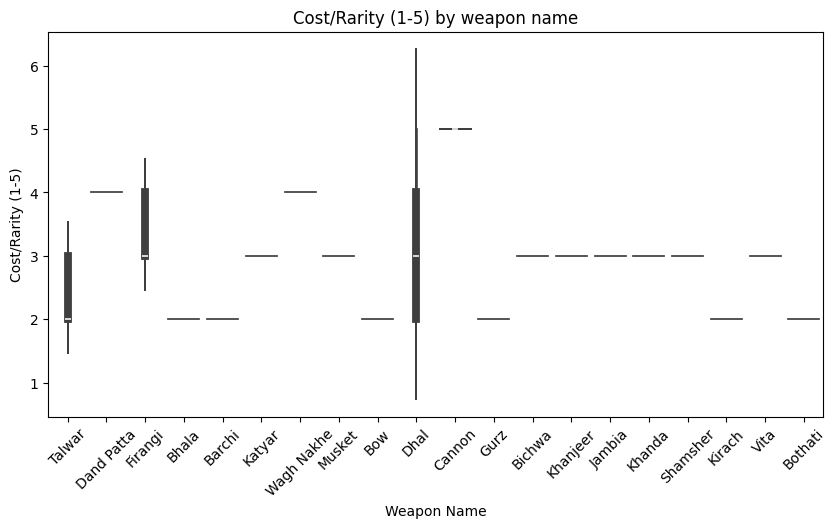

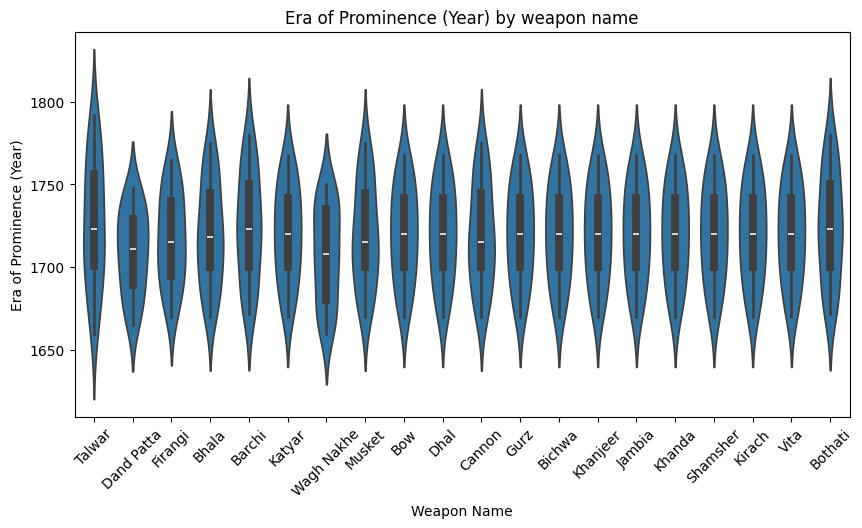

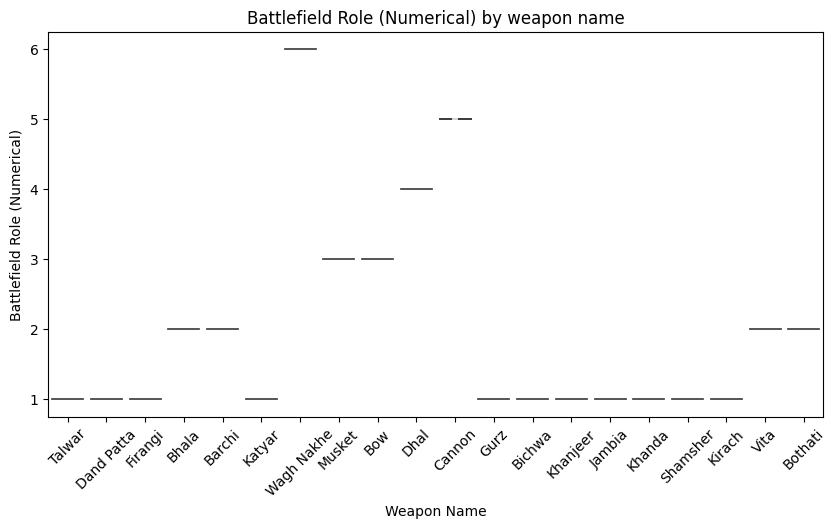

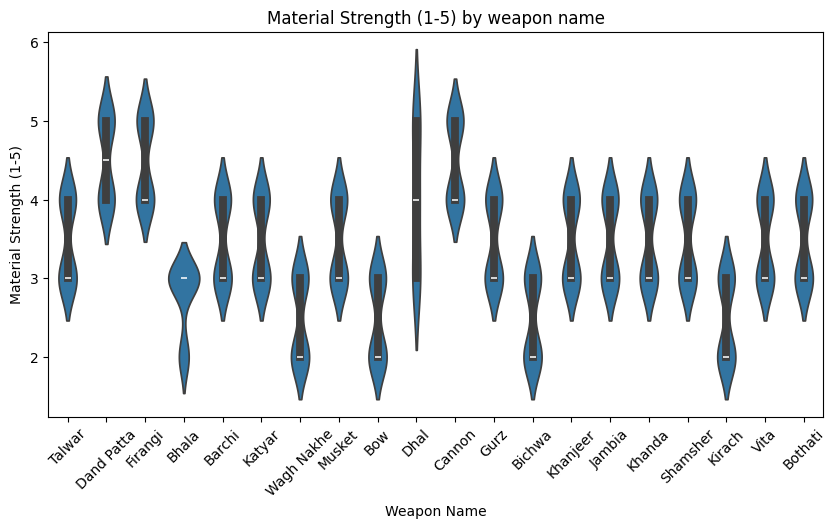

In [32]:
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df,x='Weapon Name', y=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} by weapon name')
    plt.show()

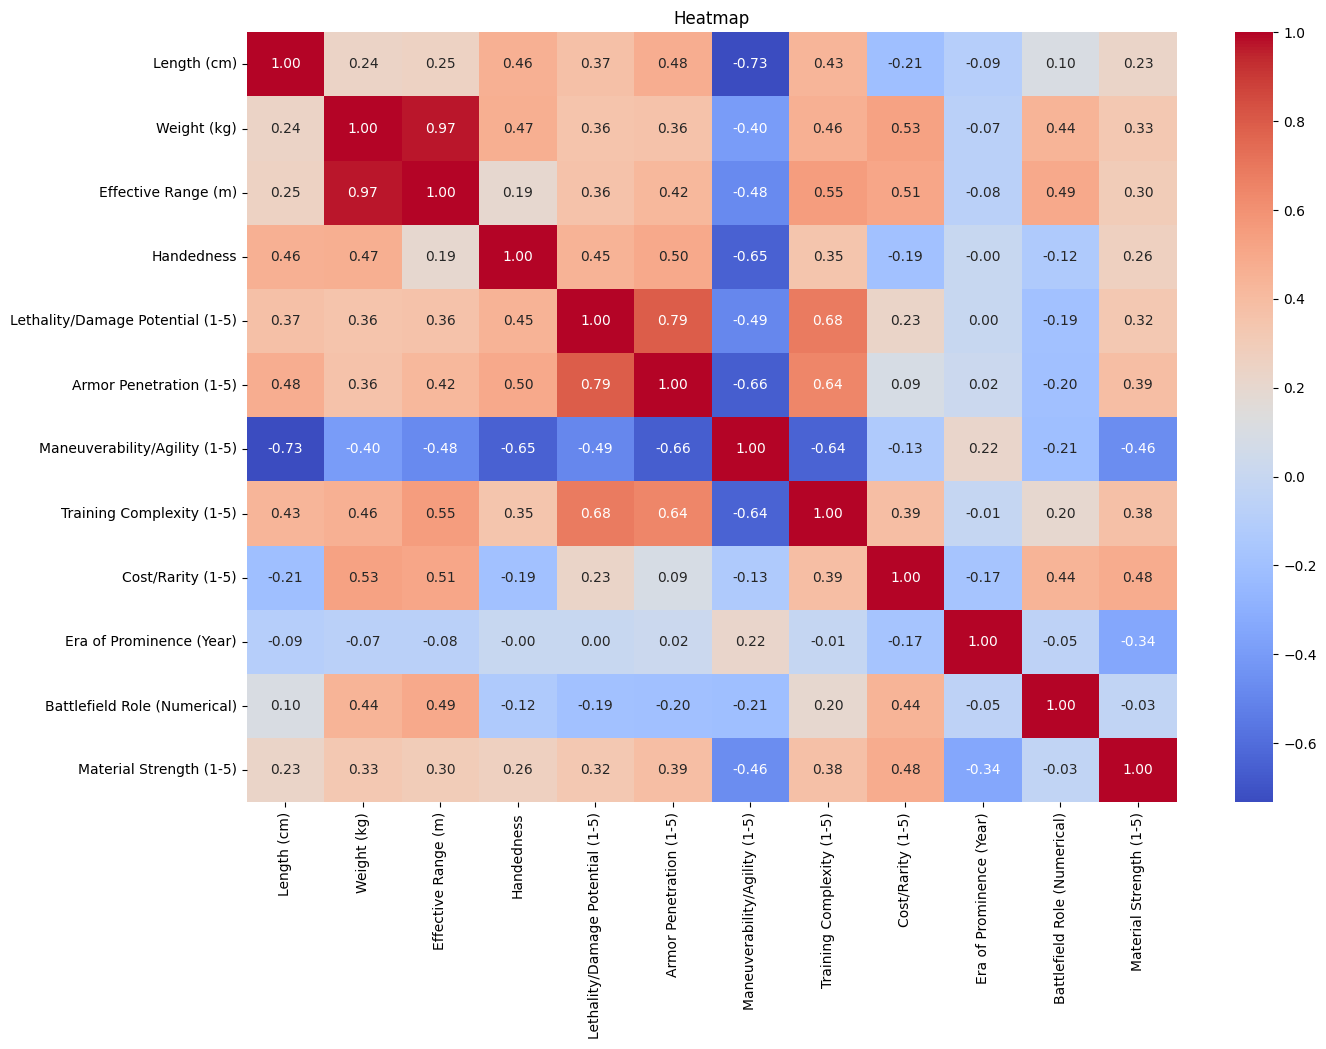

In [36]:
corr_m = df[num_col].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_m, annot=True, cmap='coolwarm',fmt='.2f')

plt.title("Heatmap")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
df = df.dropna()

In [51]:
X = df.drop('Weapon Name',axis=1)
Y = df['Weapon Name']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, confusion_matrix


In [56]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [58]:
y_pred = svm.predict(X_test)

In [59]:
print(y_pred)

['Firangi' 'Bhala' 'Dand Patta' 'Bothati' 'Vita' 'Dhal' 'Bow' 'Firangi'
 'Khanda' 'Bhala' 'Bhala' 'Vita' 'Kirach' 'Vita' 'Barchi' 'Kirach'
 'Wagh Nakhe' 'Bhala' 'Vita' 'Bhala' 'Talwar' 'Barchi' 'Shamsher' 'Gurz'
 'Bhala' 'Bow' 'Bhala' 'Bhala' 'Dand Patta' 'Musket' 'Bothati' 'Dhal'
 'Bothati' 'Kirach' 'Talwar' 'Dand Patta' 'Shamsher' 'Barchi' 'Khanjeer'
 'Katyar' 'Bichwa' 'Gurz' 'Wagh Nakhe' 'Musket' 'Jambia' 'Bothati'
 'Khanjeer' 'Bhala' 'Bhala' 'Katyar' 'Kirach' 'Bichwa' 'Bow' 'Kirach'
 'Bow' 'Katyar' 'Bhala' 'Vita' 'Firangi' 'Wagh Nakhe' 'Khanjeer'
 'Khanjeer' 'Barchi' 'Musket' 'Bhala' 'Khanjeer' 'Dhal' 'Bothati' 'Dhal'
 'Khanda' 'Bothati' 'Shamsher' 'Wagh Nakhe' 'Khanda' 'Shamsher' 'Shamsher'
 'Khanjeer' 'Firangi' 'Bow' 'Shamsher' 'Khanjeer' 'Bichwa' 'Khanjeer'
 'Kirach' 'Dand Patta' 'Kirach' 'Shamsher' 'Wagh Nakhe' 'Dand Patta'
 'Vita' 'Katyar' 'Katyar' 'Kirach' 'Jambia']


In [64]:
print("Accuracy score: ", accuracy_score(y_pred, Y_test))
print("Accuracy score: ", f1_score(y_pred, Y_test,average='weighted'))
print("Accuracy score: ", precision_score(y_pred, Y_test,average='weighted'))
print("Accuracy score: ", classification_report(y_pred, Y_test))

Accuracy score:  0.8723404255319149
Accuracy score:  0.8755897201780642
Accuracy score:  0.8976697061803445
Accuracy score:                precision    recall  f1-score   support

      Barchi       0.00      0.00      0.00         4
       Bhala       1.00      0.92      0.96        12
      Bichwa       1.00      1.00      1.00         3
     Bothati       0.43      0.50      0.46         6
         Bow       1.00      1.00      1.00         5
  Dand Patta       1.00      1.00      1.00         5
        Dhal       1.00      1.00      1.00         4
     Firangi       1.00      0.75      0.86         4
        Gurz       1.00      1.00      1.00         2
      Jambia       1.00      1.00      1.00         2
      Katyar       1.00      1.00      1.00         5
      Khanda       1.00      1.00      1.00         3
    Khanjeer       1.00      1.00      1.00         8
      Kirach       1.00      1.00      1.00         8
      Musket       1.00      1.00      1.00         3
    Shamsh

In [66]:
print("Confusin matrix: \n", confusion_matrix(y_pred, Y_test))

Confusin matrix: 
 [[ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  3  0  0]
 [ 0  0  0  0  0  0  

In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
laben = LabelEncoder()
X_train_s = scaler.fit_transform(X_train)
Y_train_s = laben.fit_transform(Y_train)
X_test_s = scaler.transform(X_test)
Y_test_s = laben.transform(Y_test)

In [75]:
svm1 = SVC(kernel='linear')
svm1.fit(X_train_s, Y_train_s)

SVC(kernel='linear')

In [76]:
y_pred_s = svm1.predict(X_test_s)

In [78]:
print("Accuracy score: ", accuracy_score(y_pred_s, Y_test_s))
print("F1 score: ", f1_score(y_pred_s, Y_test_s,average='weighted'))
print("Precision score: ", precision_score(y_pred_s, Y_test_s,average='weighted'))
print("Classification report: ", classification_report(y_pred_s, Y_test_s))

Accuracy score:  0.8723404255319149
F1 score:  0.8930714675395526
Precision score:  0.9787234042553191
Classification report:                precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       1.00      1.00      1.00        11
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         3
        

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita